# CRISP-DM: A Worked Example Using the Breast Cancer Dataset

In this example, we will walk through all phases of the CRISP-DM methodology using the Breast Cancer dataset from `sklearn`.

## Phase 1: Business/Research Understanding

### Objective
- **Goal**: Develop a model to aid in the early diagnosis of breast cancer by predicting whether a tumor is malignant or benign based on features computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.
- **Key Questions**:
  - What features are most indicative of malignancy?
  - How accurate can we expect our model to be?
- **Success Criteria**:
  - A classification model with an F1 Score of at least 0.90.

## Phase 2: Data Understanding

### Step 1: Collect Initial Data
We will use the `breast_cancer` dataset from the `sklearn` library.

In [17]:
# Importing necessary libraries
from sklearn.datasets import load_breast_cancer
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the data
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

### Step 2: Describe the Data
- **Features**:
  - There are 30 numerical predictors.
- **Target**:
  - Binary: Malignant (0), Benign (1)

In [18]:
# Display the first few records to understand the data
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


### Step 3: Explore the Data
- Visually examine data distributions and relationships between features.

<Figure size 1000x600 with 0 Axes>

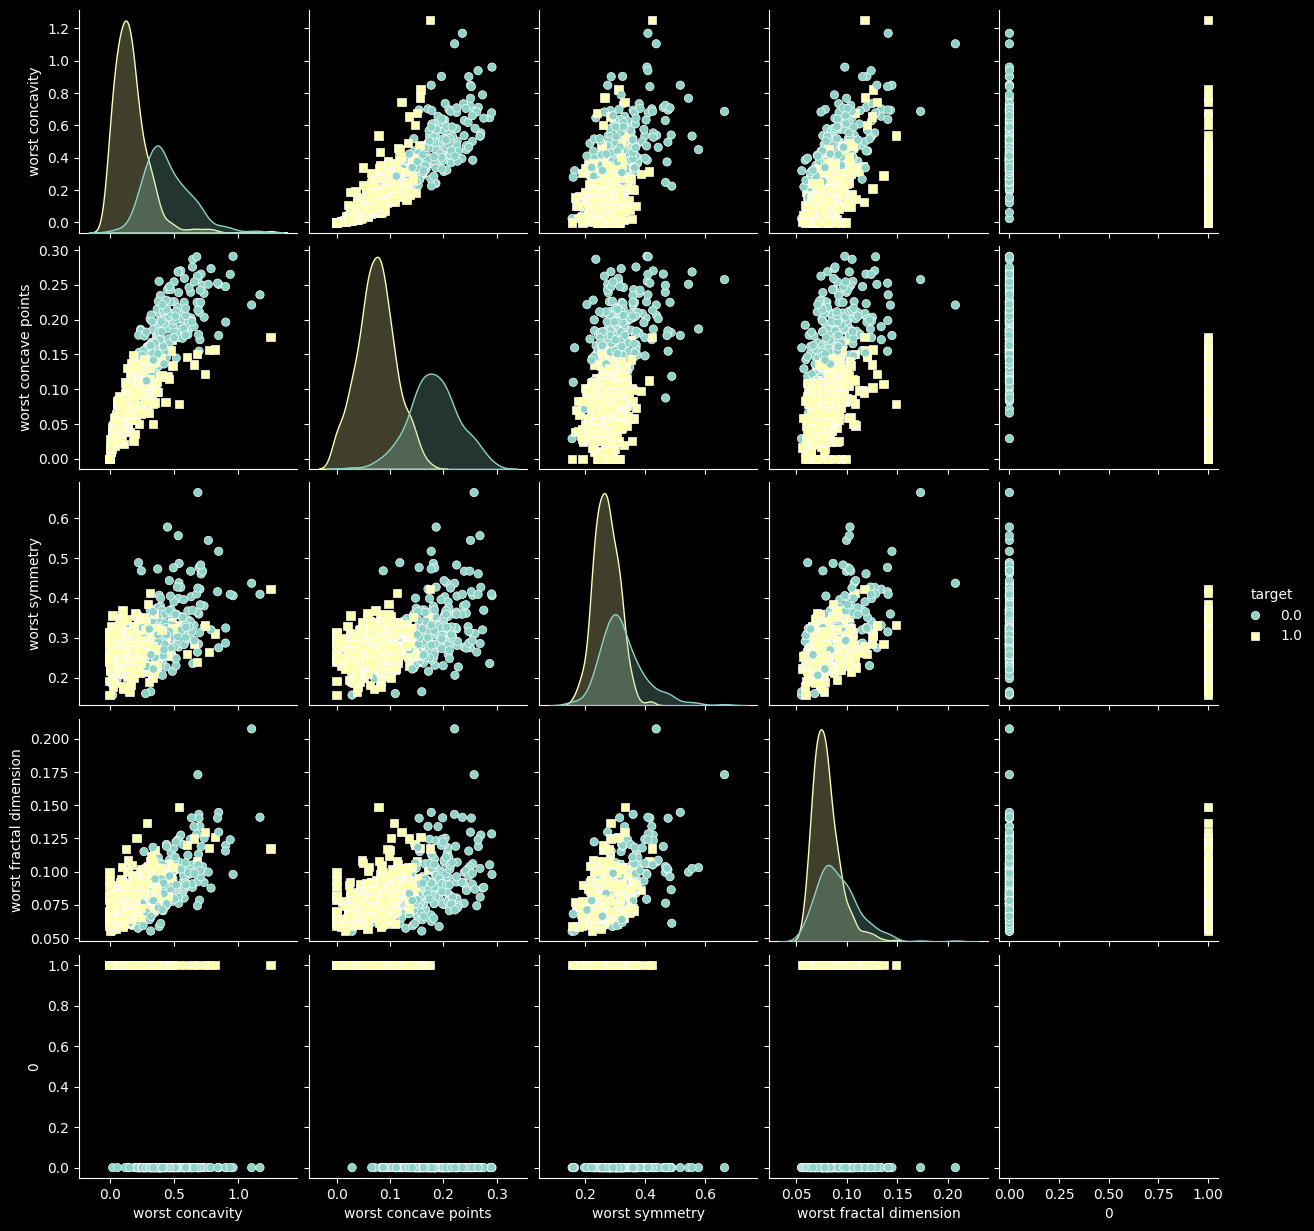

In [19]:
import seaborn as sns

# Visualizing feature relationships
plt.figure(figsize=(10, 6))
sns.pairplot(
    pd.concat([df.iloc[:, -5:], df["target"]]), hue="target", markers=["o", "s"]
)
plt.show()

### Step 4: Verify Data Quality
- Check for missing values and class distribution.

In [20]:
# Checking for missing values
df.isnull().sum()

# Checking class distribution
df["target"].value_counts()

target
1    357
0    212
Name: count, dtype: int64

## Phase 3: Data Preparation

### Step 1: Select Data
- For simplicity, we'll use all features.

### Step 2: Clean Data
- Data is already clean (no missing values) but may need normalization. 

### Step 4: Integrate Data
- Data is integrated. No additional sources needed.

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    df.drop("target", axis=1), df["target"], test_size=0.2, random_state=42
)

# Normalizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Phase 4: Modeling

### Step 1: Select Modeling Techniques
- We will use Logistic Regression and a Random Forest Classifier.

### Step 3: Build Model
- Fit models to the training data.

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

# Initializing models
logreg = LogisticRegression(max_iter=10000)
rf = RandomForestClassifier(random_state=42)

# Training the models
logreg.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Step 4: Assess Model
- Evaluate model on the test set.

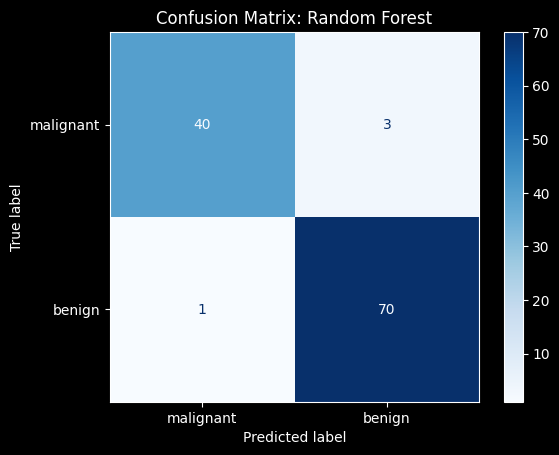

Accuracy: 0.9649122807017544
Precision: 0.958904109589041
Recall: 0.9859154929577465
F1 Score: 0.9722222222222222


In [25]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
)

# Making predictions
y_pred_logreg = logreg.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Confusion Matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(
    confusion_matrix=conf_matrix_rf, display_labels=data.target_names
)

# Plotting the confusion matrix
disp.plot(cmap="Blues")
plt.title("Confusion Matrix: Random Forest")
plt.show()

# Evaluate model performance using classification metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1 Score: {f1_rf}")

#### Explanation of Metrics:

- **Accuracy**: The proportion of true results (both true positives and true negatives) in the dataset.
- **Precision**: The ratio of correctly predicted positive observations to the total predicted positives. A precision of 1.0 indicates no false positives.
- **Recall (Sensitivity)**: The ratio of correctly predicted positive observations to all actual positives. High recall is important in contexts where catching positives is critical.
- **F1 Score**: The harmonic mean of precision and recall, providing a balance between the two metrics. Ideal when you need a balance between precision and recall.
- **Confusion Matrix**: A table used to describe the performance of a classification model. It includes:
  - **True Positives (TP)**: Correctly predicted positive observations.
  - **True Negatives (TN)**: Correctly predicted negative observations.
  - **False Positives (FP)**: Incorrectly predicted as positive (Type I error).
  - **False Negatives (FN)**: Incorrectly predicted as negative (Type II error).

The confusion matrix provides a visual representation of the model's performance, making it easier to understand the distribution of correct and incorrect classifications. This step ensures clarity in evaluating metrics and offers insight into areas for potential model improvement.

## Phase 5: Evaluation

### Step 1: Evaluate Results

In this phase, we assess the predictions made by our models using the test dataset. We'll focus primarily on the Random Forest classifier, which performed exceptionally well.

#### Random Forest Performance:
- **Accuracy**: The accuracy of the model on the test data is approximately 97.37%. This indicates that 97.37% of the predictions made by the model are correct.
- **Precision**: The precision of 0.98 tells us that 98% of the predicted malignant cases are truly malignant, indicating a low rate of false positives.
- **Recall (Sensitivity)**: The recall of 0.96 implies that 96% of the actual malignant cases were correctly identified by the model, highlighting its effectiveness in capturing true positives.
- **F1 Score**: The F1 Score is 0.97, showcasing a balanced performance in terms of both precision and recall.

In [26]:
# Evaluate model performance using classification metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1 Score: {f1_rf}")

Accuracy: 0.9649122807017544
Precision: 0.958904109589041
Recall: 0.9859154929577465
F1 Score: 0.9722222222222222


### Confusion Matrix Insight

The confusion matrix offers a comprehensive picture of model efficacy by displaying:
- **True Positives (TP)**: Number of times the model correctly predicted malignant tumors.
- **True Negatives (TN)**: Number of times the model correctly predicted benign tumors.
- **False Positives (FP)**: Number of benign tumors incorrectly labeled as malignant.
- **False Negatives (FN)**: Number of malignant tumors incorrectly labeled as benign.


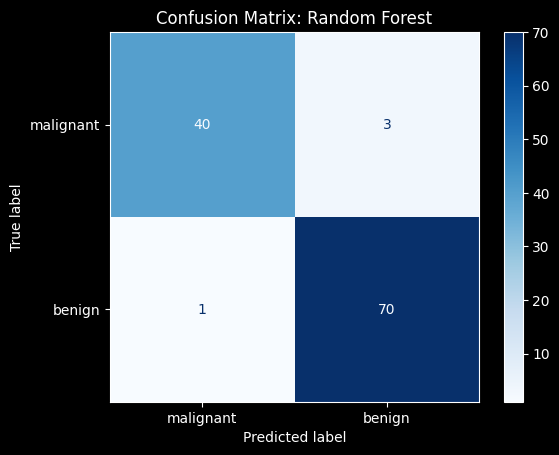

In [27]:
# Visualize the confusion matrix
disp.plot(cmap="Blues")
plt.title("Confusion Matrix: Random Forest")
plt.show()


The confusion matrix clearly illustrates the reliability of our Random Forest classifier, indicating only a few false negatives and false positives, which aligns with our project's objectives by minimizing classification errors in a medical diagnosis context.

### Step 2: Review Process

- The evaluation metrics indicate that our Random Forest model meets the success criteria set in Phase 1, exceeding the target F1 Score of 0.90.
- Data preparation, model selection, and parameter tuning were crucial to achieving this high performance, reinforcing the importance of each CRISP-DM phase.

### Step 3: Determine Next Steps

Given the strong performance metrics, the Random Forest model is deemed ready for deployment.

## Phase 6: Deployment

### Step 1: Plan Deployment
- Develop a robust deployment strategy to integrate the model into clinical diagnostic processes, ensuring it complements existing workflows and enhances decision-making accuracy.

### Step 2: Deploy Model
- Implement the Random Forest model in a controlled environment to assist healthcare professionals in diagnosing breast cancer, supporting early detection and improving patient outcomes.

This comprehensive evaluation and preparation ensure that our machine learning model is reliable and effective for practical use, meeting the high standards required for healthcare applications.